In [1]:
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
from astropy.io import fits

In [3]:
filename = "clouds55059031_55059035_weighted.fits"
with fits.open(filename) as hdul:  # open a FITS file
    data = hdul[1].data  # assume the first extension is an image

In [6]:
data

FITS_rec([(46, 0.17517951, 0.02664947), (55, 0.11325672, 0.01945315),
          ( 0,        nan,        nan), ..., ( 0,        nan,        nan),
          ( 0,        nan,        nan), ( 0,        nan,        nan)],
         dtype=(numpy.record, [('nobs', '>i4'), ('clouds', '>f4'), ('sigma', '>f4')]))

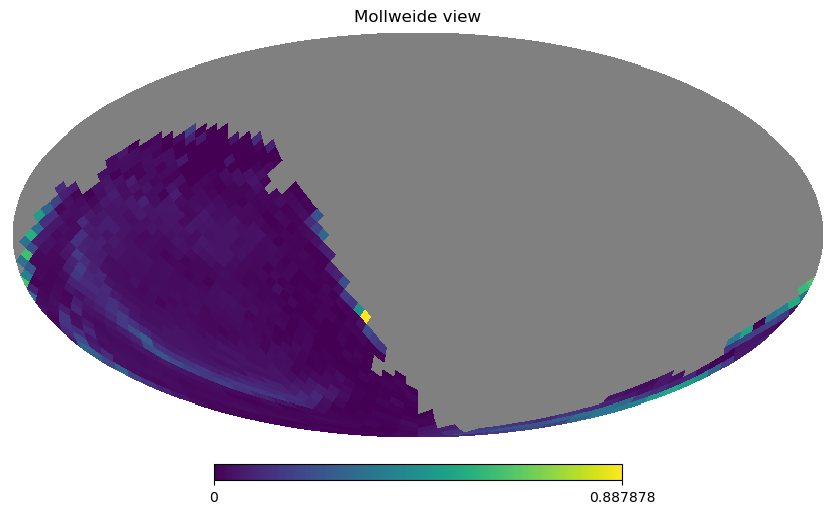

In [10]:
hp.mollview(data["clouds"], nest=True, min=0)